**นายปิยภูมิ มืดคำบง 6530200282 S05**





In [286]:
# prompt: import tensorflow compat v1

import tensorflow.compat.v1 as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

import plotly
import plotly.graph_objs as go
import plotly.express as px

K = tf.keras.backend
epoch = 100


In [287]:
dataset = pd.read_csv('weather.csv')

In [288]:
dataset.shape

(366, 22)

In [289]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


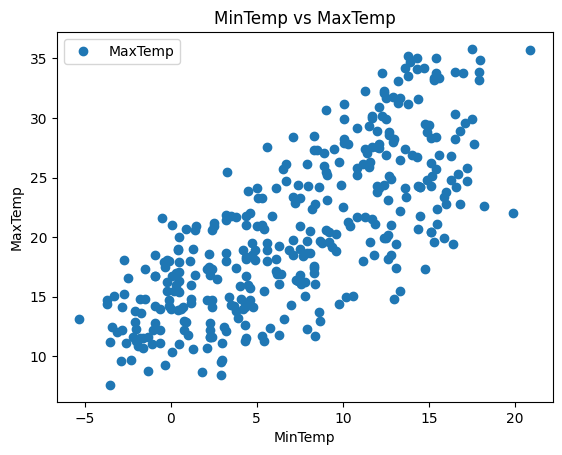

In [290]:
#plot mmin max to show data distribution
dataset.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

<ipython-input-291-f7d9f9599b8b>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='MaxTemp', ylabel='Density'>

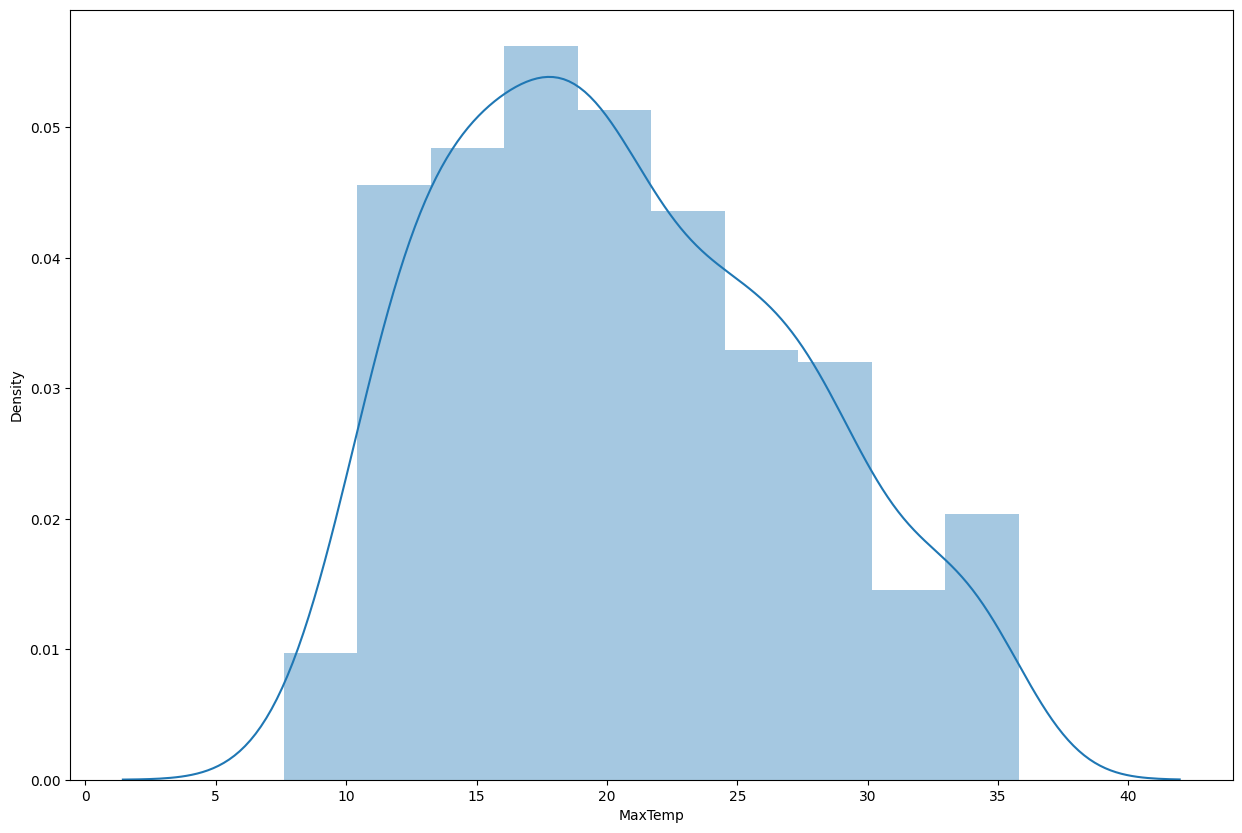

In [291]:
# show MaxTemp Value
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset['MaxTemp'])

In [292]:
x = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

x.shape, y.shape

((366, 1), (366, 1))

In [293]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

y_test

array([[26.9],
       [28.3],
       [33.9],
       [14. ],
       [11.3],
       [18.5],
       [21.4],
       [14.8],
       [20.7],
       [10.6],
       [19.8],
       [17. ],
       [20.6],
       [19. ],
       [27.9],
       [27.1],
       [11.8],
       [14.5],
       [25.9],
       [27.6],
       [27.8],
       [21.1],
       [23.4],
       [20.2],
       [16.7],
       [24.2],
       [19. ],
       [21. ],
       [16.3],
       [15.5],
       [17.9],
       [25.1],
       [14.7],
       [14.1],
       [29.9],
       [24.2],
       [20.4],
       [18.2],
       [22.2],
       [16.2],
       [21.7],
       [34.9],
       [21.7],
       [ 8.8],
       [28.8],
       [29.3],
       [13.2],
       [20.9],
       [24.3],
       [11.8],
       [15.2],
       [18. ],
       [27.6],
       [17.3],
       [13.8],
       [18. ],
       [12.2],
       [29.9],
       [16. ],
       [14. ],
       [27.1],
       [24.7],
       [17.5],
       [19.5],
       [19. ],
       [23.3],
       [15

In [294]:
def rmse(y_true, y_pred):
  return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [295]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1,kernel_initializer='random_uniform',activation='linear'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [296]:
SGD = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='mse', optimizer=SGD, metrics=[rmse])

In [297]:
history = model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=1,validation_split=0.2,shuffle=True)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 225.3563 - rmse: 13.0800 - val_loss: 117.4319 - val_rmse: 8.9666
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 93.9030 - rmse: 7.9021 - val_loss: 119.2175 - val_rmse: 8.8376
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 95.8169 - rmse: 8.0448 - val_loss: 116.1148 - val_rmse: 8.7199
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 86.9954 - rmse: 7.5924 - val_loss: 111.0694 - val_rmse: 8.5906
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 92.8316 - rmse: 8.0488 - val_loss: 109.1379 - val_rmse: 8.4784
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 83.1818 - rmse: 7.5476 - val_loss: 103.6352 - val_rmse: 8.3633
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 86.0526 - rmse: 7.7844 - val_loss: 107.7576 - val_rmse: 8.2979
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 73.9245 - rmse: 7.2701 - val_loss: 97.6325 - val_rmse: 8.1485
Epoch 9/100
24/24 ━━━━

In [298]:
h1 = go.Scatter(y=history.history['loss'], mode='lines',
                line=dict(
                    width=2,
                    color='blue'),
                    name='loss')

In [299]:
h2 = go.Scatter(y=history.history['val_loss'], mode='lines',
                line=dict(
                    width=2,
                    color='red'),
                    name='val_loss')

In [300]:
data = [h1,h2]
layout1 = go.Layout(title='Loss', xaxis=dict(title='Epoch'), yaxis=dict(title='Loss'))
fig1 = go.Figure(data=data, layout=layout1)
plotly.offline.iplot(fig1)

In [301]:
y_pred = model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [302]:
y_pred = np.array(y_pred).flatten()
y_test = np.array(y_test).flatten()

# Now create the DataFrame
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head())

   Actual  Predicted
0    26.9  25.495789
1    28.3  28.291952
2    33.9  31.303202
3    14.0  16.569580
4    11.3   9.901810


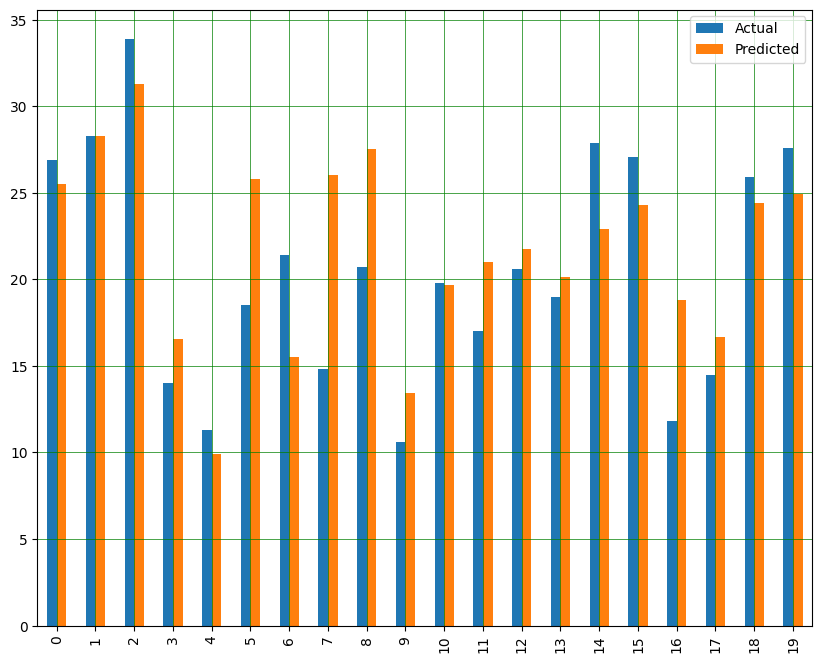

In [303]:
df1 = df.head(20)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

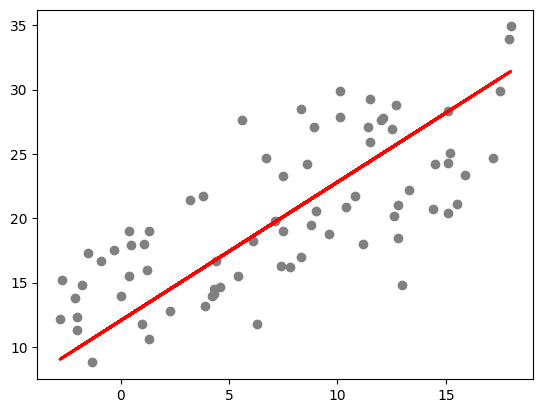

In [304]:
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

In [305]:
y_test = y_test.reshape(-1, 1)

model_accuracy = model.evaluate(x_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 20.7150 - rmse: 3.8837


In [306]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.93911707594588
Mean Squared Error: 20.714400296308604
Root Mean Squared Error: 4.551307536995122


**Machine Learning Models (Logistic Regression & Decision Tree) ทำ classification ว่าฝนจะตกไหม ?**

In [307]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import log_loss

In [308]:
#Load data
dataset = dataset.dropna()  # Use dataset instead of df to preserve the original data
dataset

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [309]:
# เลือก features และ target
X = dataset.drop(columns=["RainTomorrow"])
y = dataset["RainTomorrow"]

In [310]:
# แปลงค่าหมวดหมู่ให้เป็นตัวเลข
label_encoders = {}
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le
y = LabelEncoder().fit_transform(y)

In [311]:
# แบ่งข้อมูล train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [312]:
#Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
y_pred_log_proba = log_reg.predict_proba(X_test_scaled)

In [313]:
#Decision Tree
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
y_pred_tree_proba = tree_clf.predict_proba(X_test)

In [314]:
# ประเมินผล
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("\nDecision Tree Report:\n", classification_report(y_test, y_pred_tree))

Logistic Regression Accuracy: 0.9545454545454546
Decision Tree Accuracy: 1.0

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        56
           1       1.00      0.70      0.82        10

    accuracy                           0.95        66
   macro avg       0.97      0.85      0.90        66
weighted avg       0.96      0.95      0.95        66


Decision Tree Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        10

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



In [315]:
# คำนวณ Loss
log_reg_loss = log_loss(y_test, y_pred_log_proba)
tree_loss = log_loss(y_test, y_pred_tree_proba)
print("Logistic Regression Loss:", log_reg_loss)
print("Decision Tree Loss:", tree_loss)

Logistic Regression Loss: 0.11584942048495991
Decision Tree Loss: 2.2204460492503136e-16
